In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import deepcopy as copy
import matplotlib.backends.backend_pdf
import scipy as sp
import scipy.stats as stats
import math
import matplotlib.backends.backend_pdf as pdfFig
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
# plotly.tools.set_credentials_file(username='mhossa10', api_key='CSWpOV3xHUVRzimjfHSB')

In [22]:
color_list1 = ['#1b9e77', '#d95f02', '#7570b3', '#e7298a', '#66a61e', '#e6ab02']
color_list2 = ['#e41a1c', '#377eb8', '#4daf4a', '#984ea3', '#ff7f00', '#ffff33']
color_list3 = ['#a6cee3', '#1f78b4', '#b2df8a', '#33a02c', '#fb9a99', '#e31a1c']
color_list4 = ["#FF1F5B", "#00CD6C", "#009ADE", "#AF58BA", "#FFC61E", "#F28522", "#A0B1BA", "#A6761D", "#00B000", "#E9002D", "#FFAA00"]

In [3]:
ful_graph_list = [
    "333SP"
    , "4elt"
    , "AS365"
    , "G3_circuit"
    , "G_n_pin_pout"
    , "M6"
    , "NACA0015"
    , "NLR"
    , "Oregon-2"
    , "af_shell10"
    , "af_shell9"
    , "asia"
    , "belgium"
    , "ca-AstroPh"
    , "ca-CondMat"
    , "ca-HepPh"
    , "ca-HepTh"
    , "cage15"
    , "caidaRouterLevel"
    , "citationCiteseer"
    , "cnr-2000"
    , "coAuthorsCiteseer"
    , "coAuthorsDBLP"
    , "coPapersCiteseer"
    , "coPapersDBLP"
    , "copter2"
    , "delaunay_n11"
    , "delaunay_n12"
    , "delaunay_n13"
    , "delaunay_n14"
    , "delaunay_n15"
    , "delaunay_n16"
    , "delaunay_n17"
    , "delaunay_n18"
    , "delaunay_n19"
    , "delaunay_n20"
    , "delaunay_n21"
    , "delaunay_n22"
    , "delaunay_n23"
    , "delaunay_n24"
    , "ecology1"
    , "ecology2"
    , "email-Enron"
    , "eu-2005"
    , "europe"
    , "fe_sphere"
    , "germany"
    , "great-britain"
    , "hugebubbles-00000"
    , "hugebubbles-00010"
    , "hugebubbles-00020"
    , "hugetrace-00000"
    , "hugetrace-00010"
    , "hugetrace-00020"
    , "hugetric-00000"
    , "hugetric-00010"
    , "hugetric-00020"
    , "in-2004"
    , "inf-europe_osm"
    , "inf-italy_osm"
    , "italy"
    , "kkt_power"
    , "ldoor"
    , "loc-Brightkite"
    , "loc-Gowalla"
    , "luxembourg"
    , "mdual"
    , "netherlands"
    , "nlpkkt120"
    , "nlpkkt160"
    , "nlpkkt200"
    , "nlpkkt240"
    , "nlpkkt80"
    , "roadNet-PA"
    , "roadNet-TX"
    , "road_central"
    , "road_usa"
    , "smallworld"
    , "thermal2"
    , "uk"
    , "uk2002"
    , "uk-2002"
]
better_result_graphs = [
     "delaunay_n11"
    , "delaunay_n12"
    , "delaunay_n13"
    , "delaunay_n14"
    , "delaunay_n15"
    , "delaunay_n16"
    , "delaunay_n17"
    , "delaunay_n18"
    , "delaunay_n19"
    , "delaunay_n20"
    , "delaunay_n21"
    , "delaunay_n22"
    , "delaunay_n23"
    , "delaunay_n24"
    , "nlpkkt120"
    , "nlpkkt160"
    , "nlpkkt200"
    , "nlpkkt240"
    , "nlpkkt80"
]
graph_list = [
    "333SP"
#     , "4elt"
    , "AS365"
#     , "G3_circuit"
#     , "G_n_pin_pout"
    , "M6"
    , "NACA0015"
    , "NLR"
    , "Oregon-2"
#     , "af_shell9"
    , "asia"
    , "belgium"
#     , "ca-AstroPh"
#     , "ca-CondMat"
#     , "ca-HepPh"
#     , "ca-HepTh"
#     , "cage15"
#     , "citationCiteseer"
#     , "cnr-2000"
#     , "coAuthorsDBLP"
#     , "coPapersDBLP"
#     , "copter2"
    , "delaunay_n24"
#     , "ecology1"
#     , "email-Enron"
    , "europe"
    , "germany"
#     , "great-britain"
#     , "hugebubbles-00000"
    , "in-2004"
#     , "inf-europe_osm"
#     , "italy"
    , "kkt_power"
#     , "ldoor"
#     , "loc-Brightkite"
    , "loc-Gowalla"
    , "luxembourg"
#     , "mdual"
    , "netherlands"
#     , "nlpkkt80"
#     , "nlpkkt120"
#     , "nlpkkt160"
    , "nlpkkt200"
#     , "nlpkkt240"
    , "roadNet-PA"
#     , "smallworld"
#     , "thermal2"
    , "uk-2002"
]

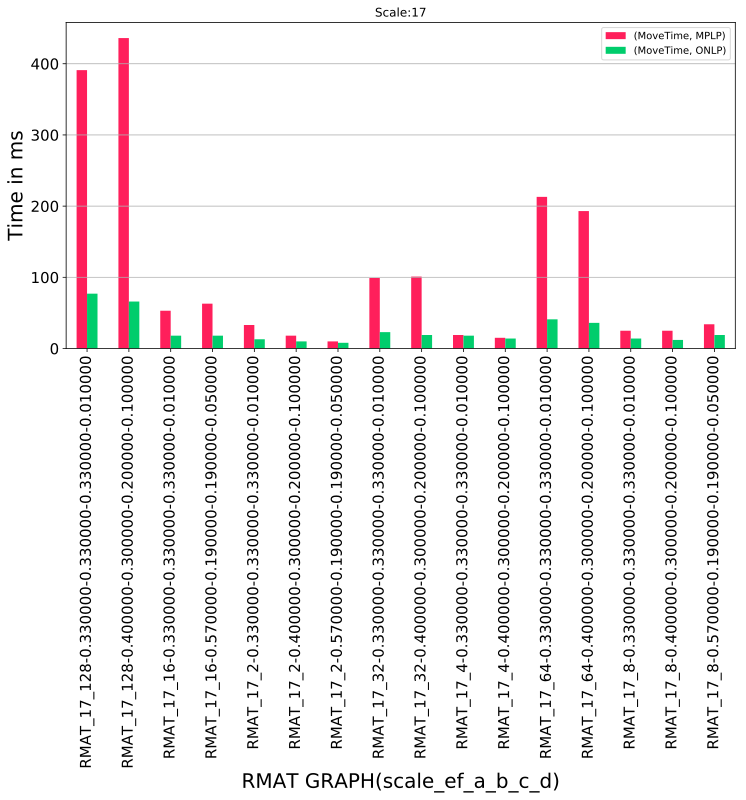

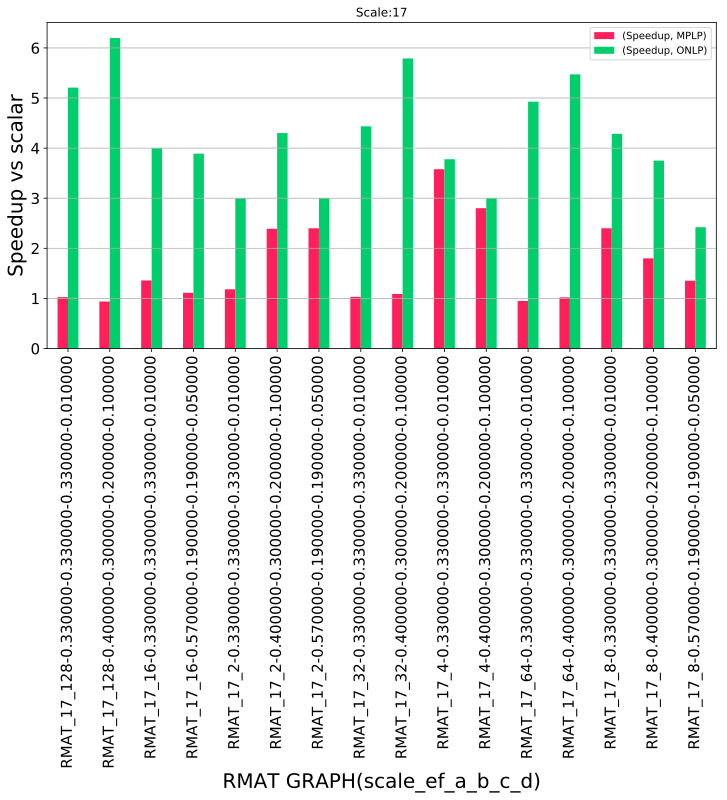

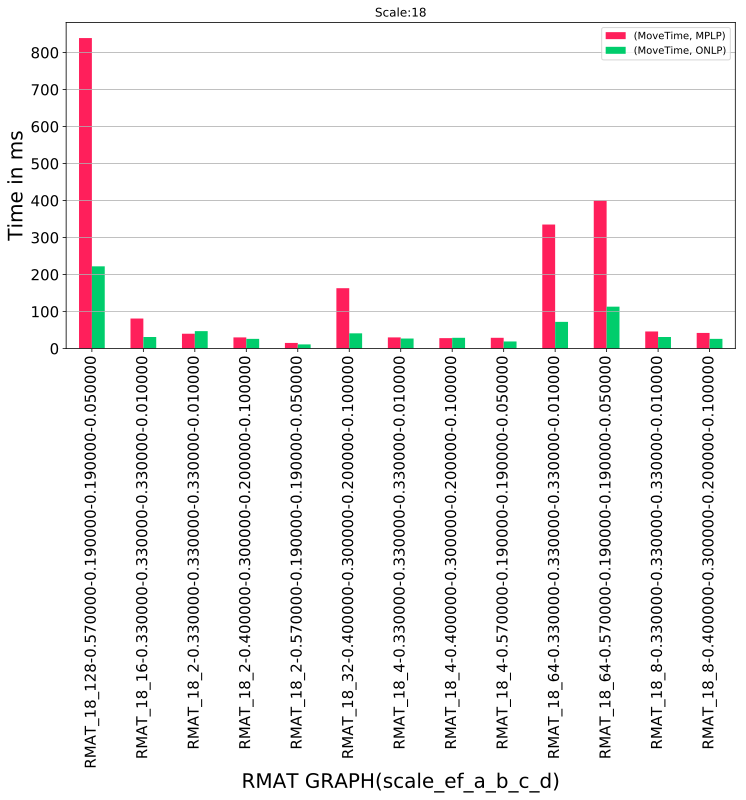

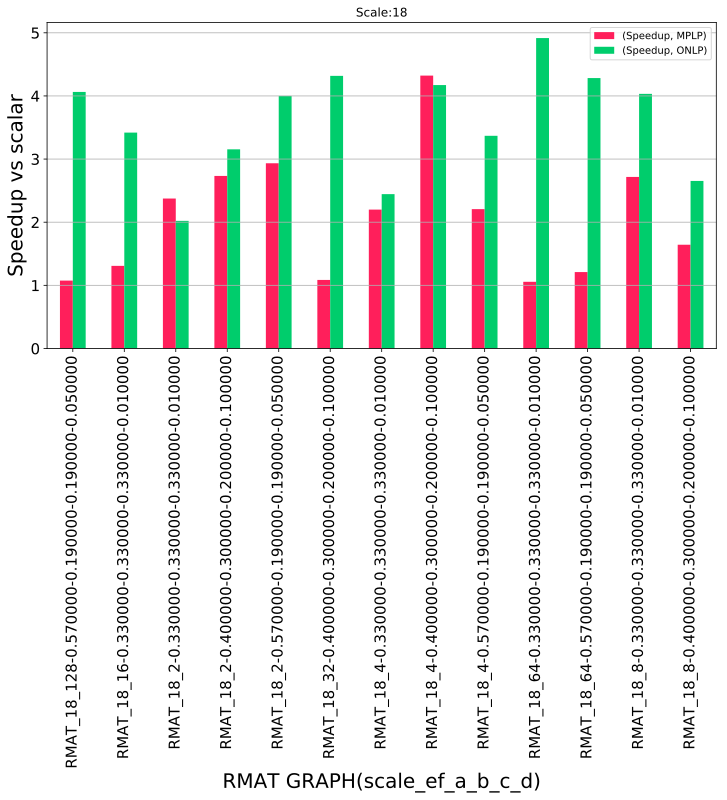

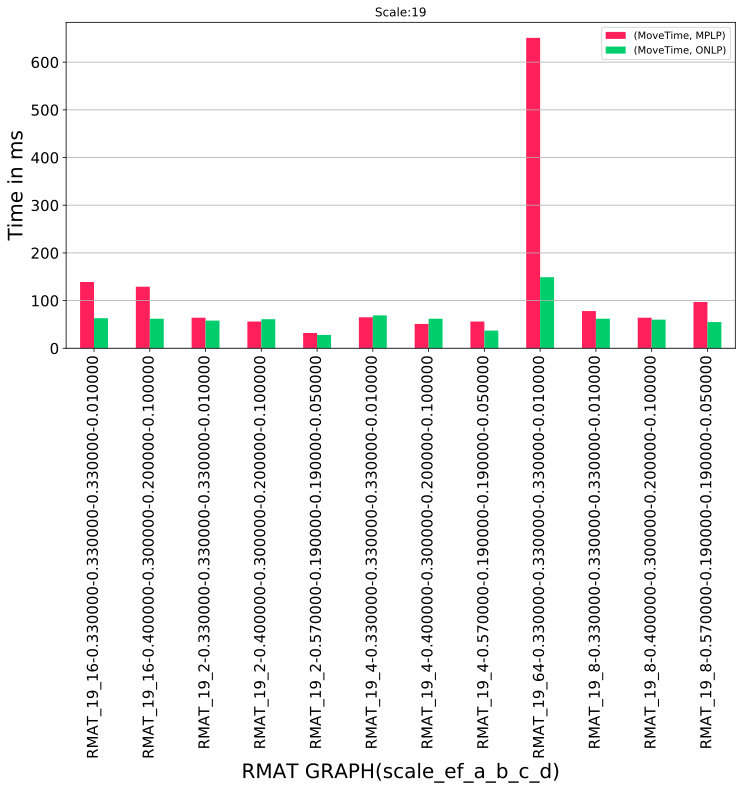

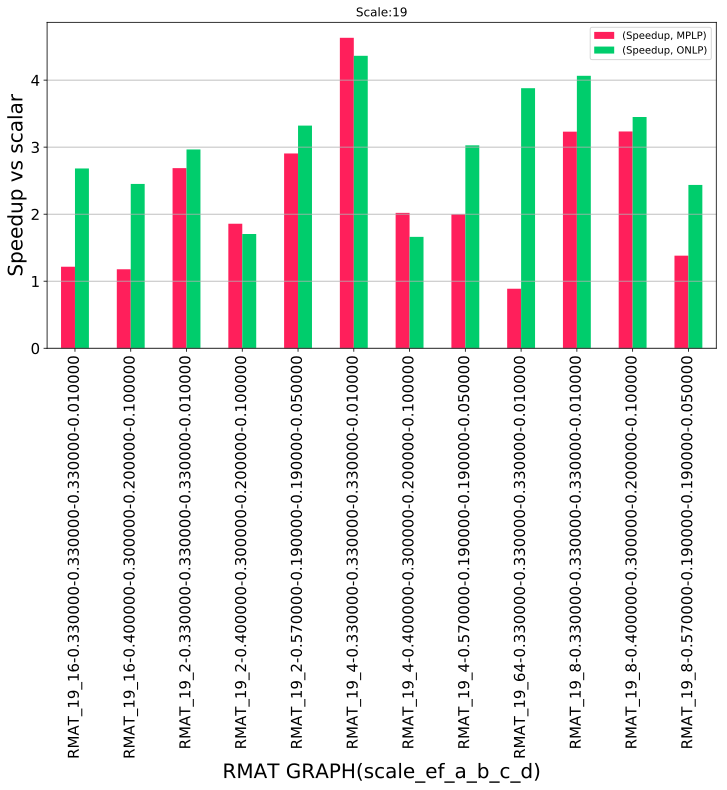

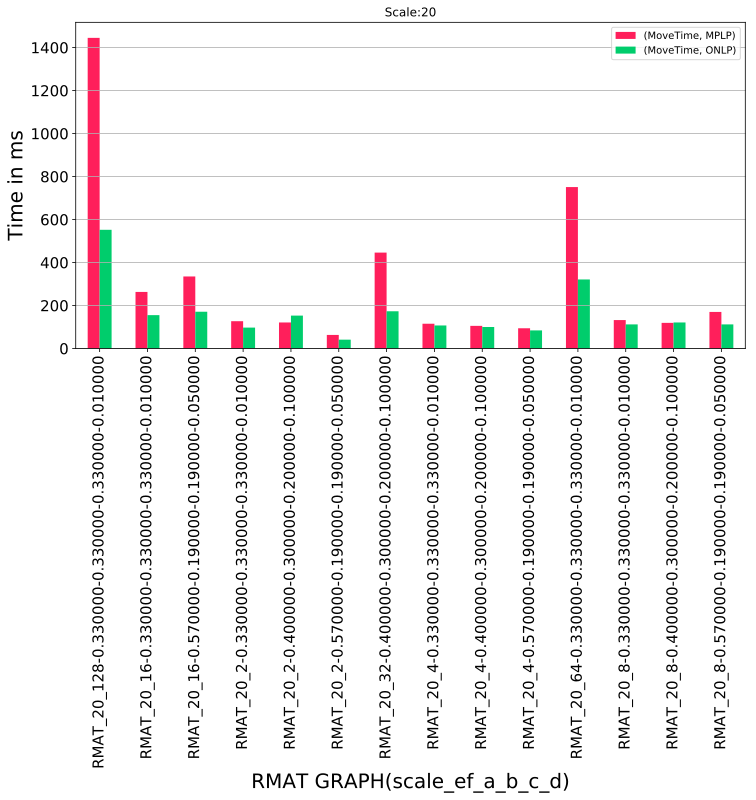

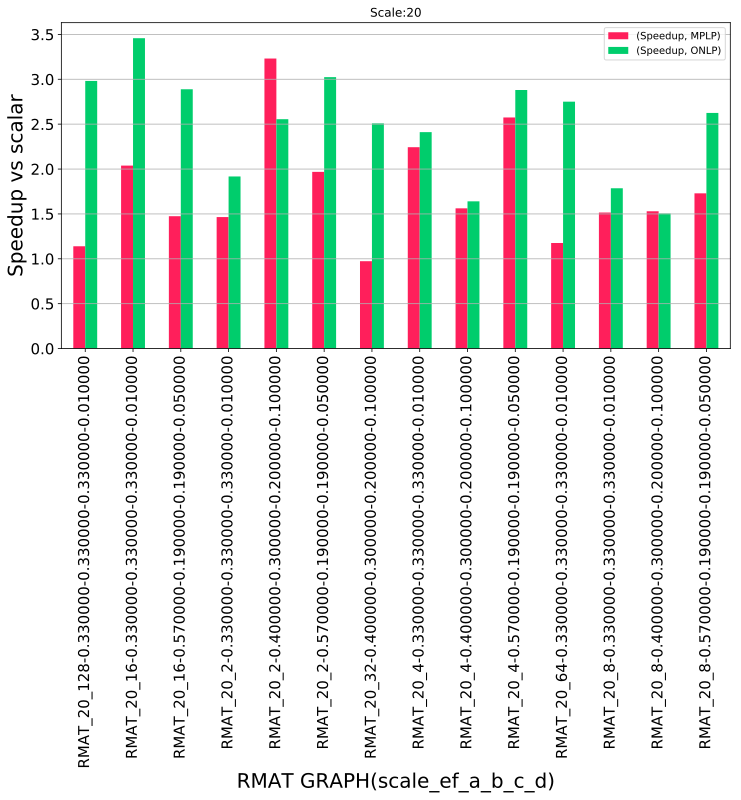

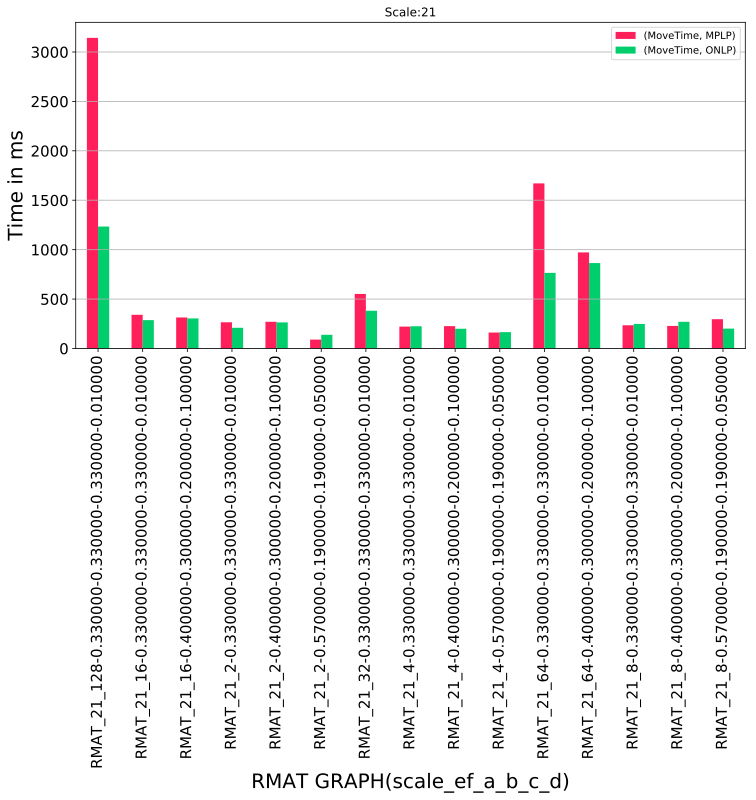

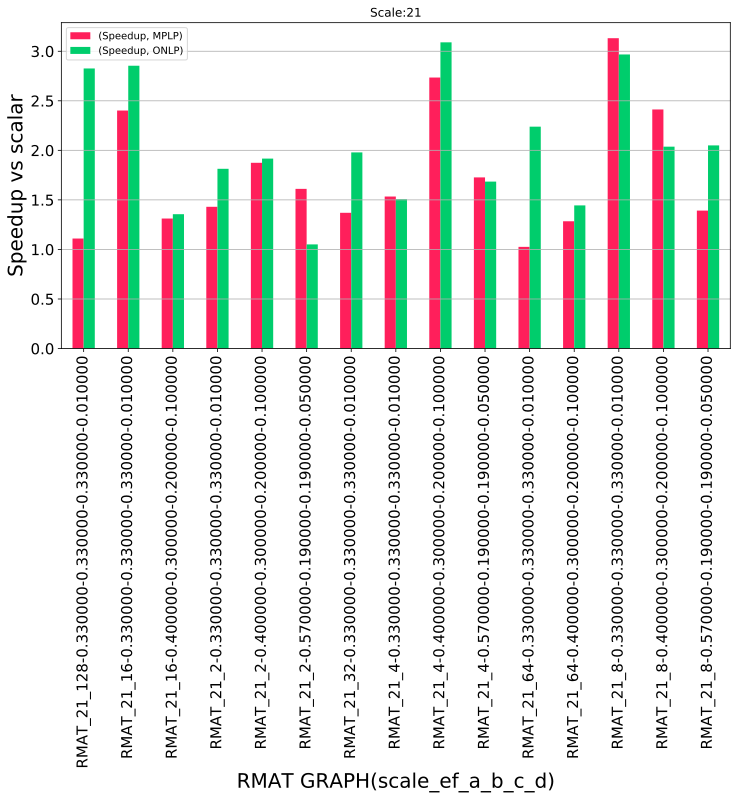

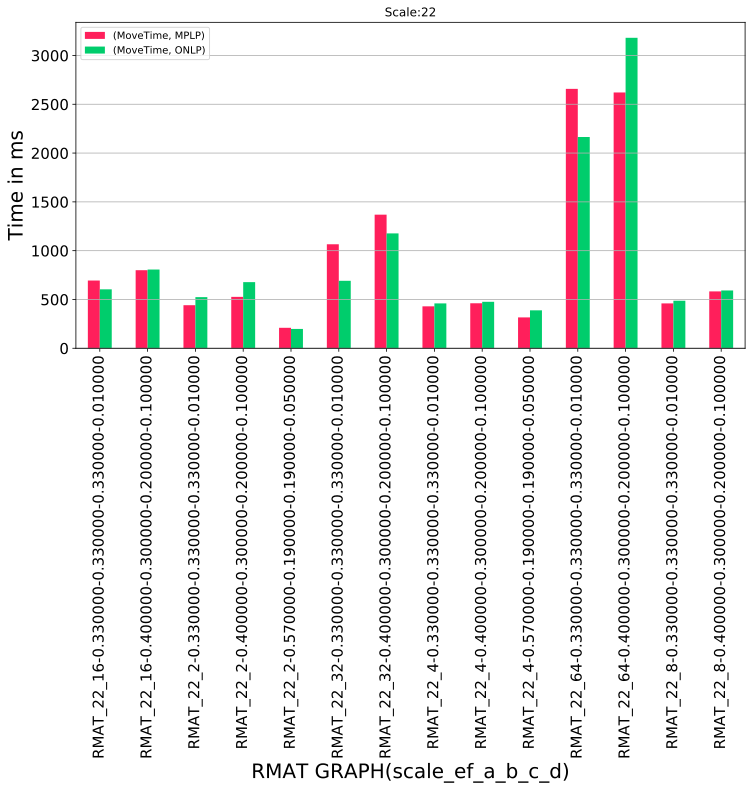

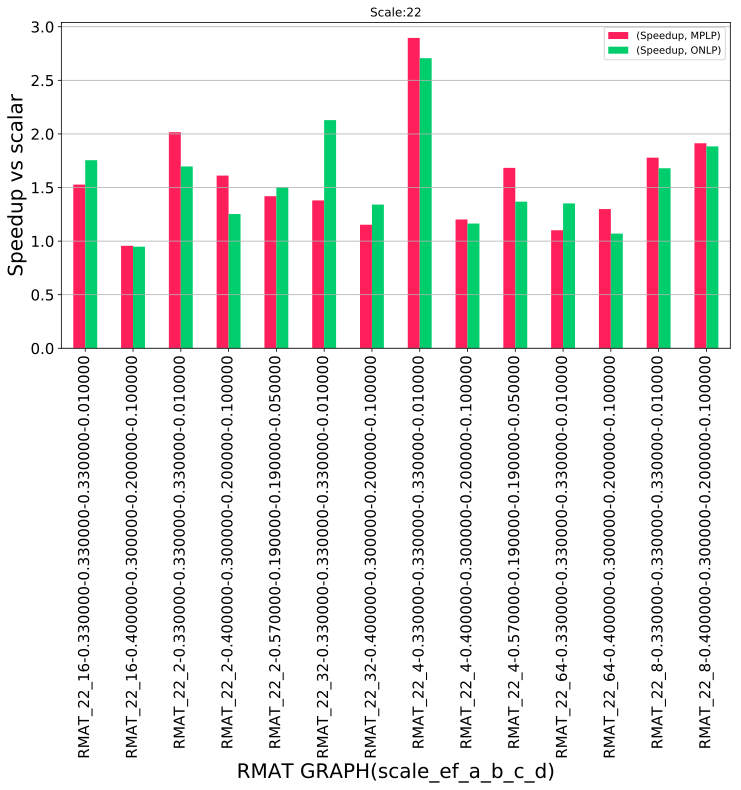

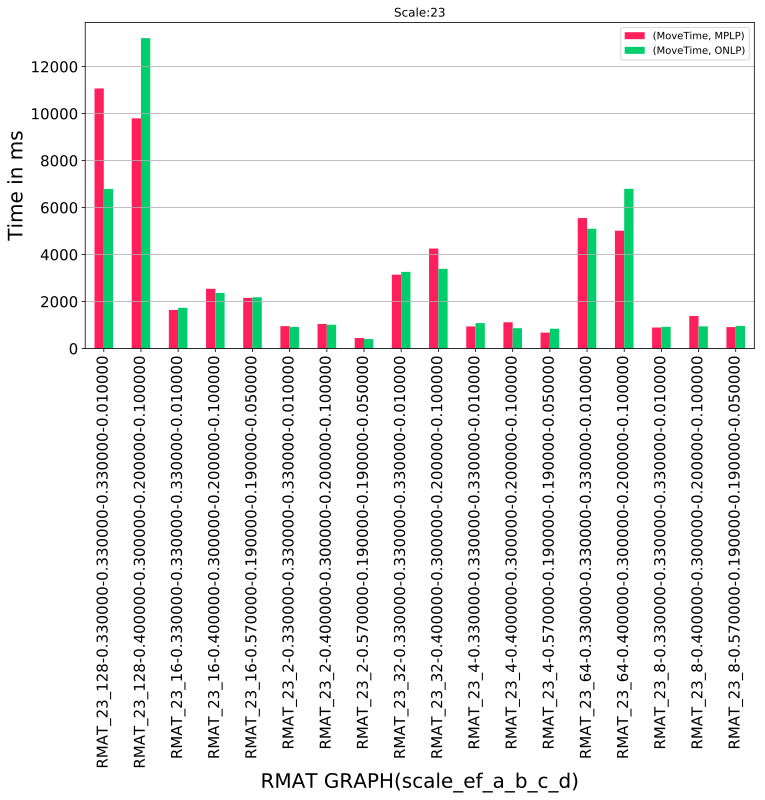

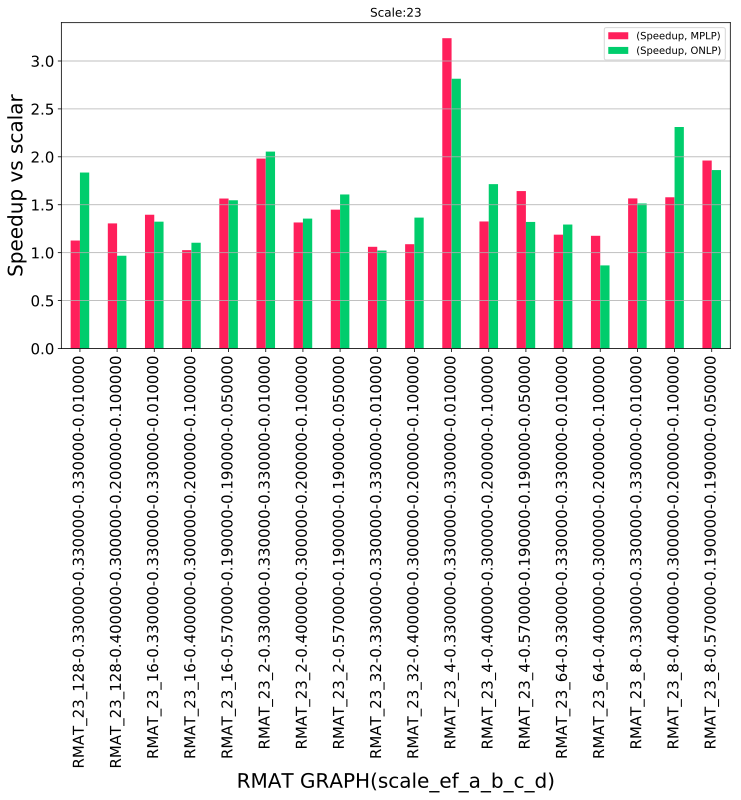

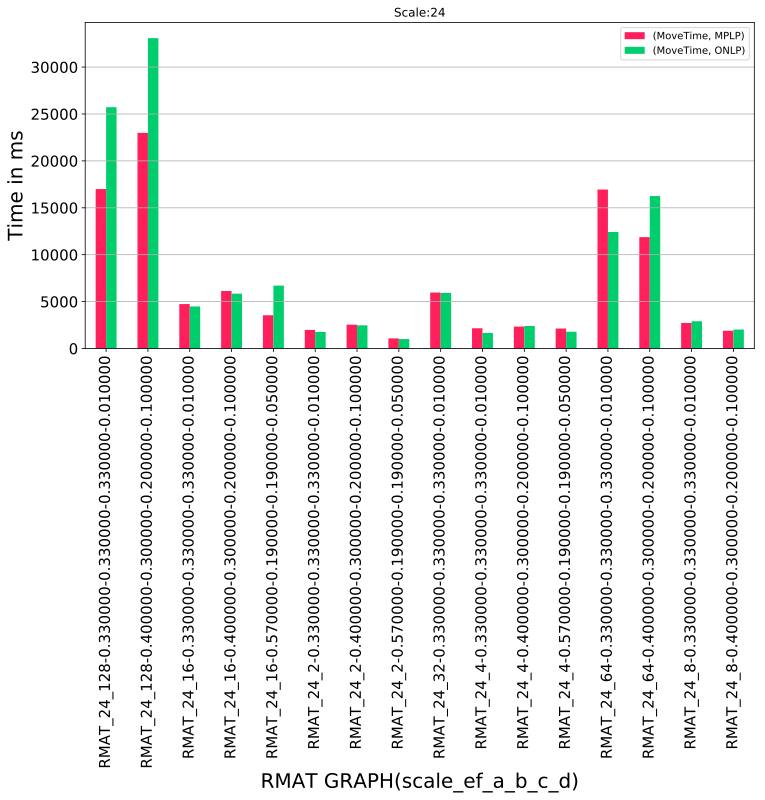

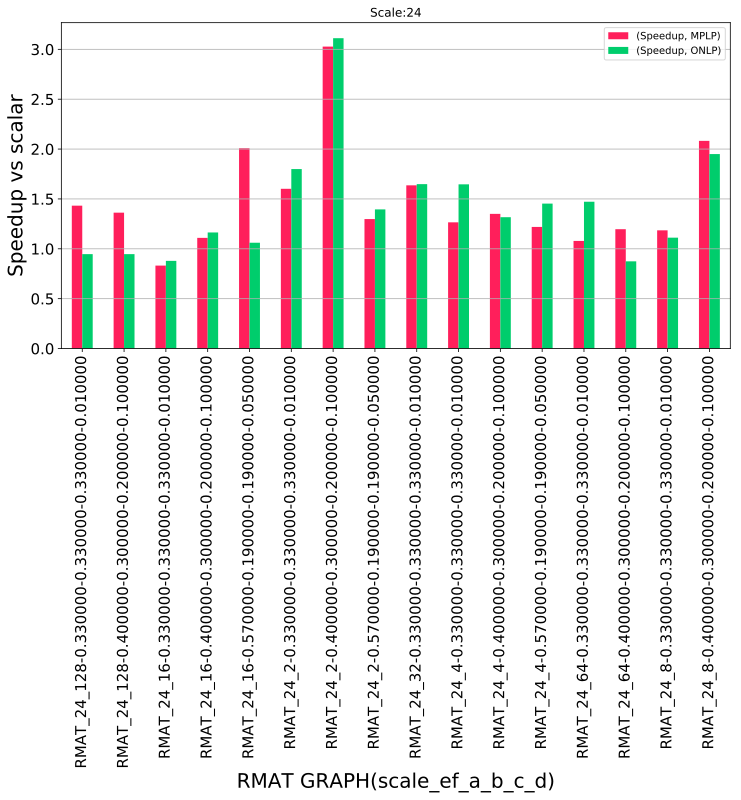

In [64]:
RMAT_Results = pd.read_csv('build/Journal_Results/RMAT_Partial_Vec_CascadeLake.csv')
# Louvain_Result_Cascade = pd.read_csv('build/Journal_Results/LM/RMAT_Partial_Vec_SkyLake.csv')
# Louvain_Result_Skylake = pd.read_csv('build/Journal_Results/LM/Partial_Vec_SkyLake.csv')
# LP_Result_Cascade = pd.read_csv('build/Journal_Results/LP/Partial_Vec_CascadeLake.csv')
# LP_Result_Skylake = pd.read_csv('build/Journal_Results/LP/RMAT_Partial_Vec_SkyLake.csv')
LP_Result_Cascade = RMAT_Results[RMAT_Results["Version"].isin(["MPLP", "ONLP", "PLP"])].reset_index()
LP_Result_Cascade = LP_Result_Cascade.groupby(["GraphName", "Version", "Scale", "EdgeFactor", "a", "b", "c", "d"]).mean().reset_index()
speed = []
for i,r in LP_Result_Cascade.iterrows():
    LP_Result_Cascade.at
    scalar = LP_Result_Cascade[(LP_Result_Cascade["Version"] == "PLP") &
                               (LP_Result_Cascade["GraphName"] ==r["GraphName"]) &
                               (LP_Result_Cascade["Scale"] ==r["Scale"]) &
                               (LP_Result_Cascade["EdgeFactor"] ==r["EdgeFactor"]) &
                               (LP_Result_Cascade["a"] ==r["a"]) &
                               (LP_Result_Cascade["b"] ==r["b"]) &
                               (LP_Result_Cascade["c"] ==r["c"]) &
                               (LP_Result_Cascade["d"] ==r["d"])
                              ].reset_index()
    if len(scalar) >0:
        speed.append(scalar.iloc[0]["MoveTime"]/r["MoveTime"])
    else:
        print(r["GraphName"])
        speed.append(0)
LP_Result_Cascade["Speedup"] = speed
pdf1 = matplotlib.backends.backend_pdf.PdfPages("label_propagation_time_comparison_of_rmat_graph.pdf")
pdf2 = matplotlib.backends.backend_pdf.PdfPages("label_propagation_speedup_comparison_of_rmat_graph.pdf")   
for scale,data in LP_Result_Cascade.groupby("Scale"):
    fd = data[data["Version"].isin(["MPLP", "ONLP"])].pivot(index='GraphName', columns="Version", values=["MoveTime"])
    ax = fd.plot.bar(color=color_list4, rot=90, figsize=(12, 6), legend=True, fontsize=15)
    ax.set_xlabel("RMAT GRAPH(scale_ef_a_b_c_d)", fontsize = 20)
    ax.set_ylabel("Time in ms", fontsize = 20)
    ax.grid(axis="y")
    ax.legend()
    ax.set_title("Scale:" + str(scale))
    pdf1.savefig(bbox_inches='tight')

    fd = data[data["Version"].isin(["MPLP", "ONLP"])].pivot(index='GraphName', columns="Version", values=["Speedup"])
    ax = fd.plot.bar(color=color_list4, rot=90, figsize=(12, 6), legend=True, fontsize=15)
    ax.set_xlabel("RMAT GRAPH(scale_ef_a_b_c_d)", fontsize = 20)
    ax.set_ylabel("Speedup vs scalar", fontsize = 20)
    ax.grid(axis="y")
    ax.legend()
    ax.set_title("Scale:" + str(scale))
    pdf2.savefig(bbox_inches='tight')
pdf1.close()
pdf2.close()
# for name,group in LP_Result_Cascade.groupby("GraphName"):
#     print(name)
    
# LP_Result_Cascade.keys()


In [57]:
RMAT_Results.keys()

Index(['GraphName', 'Version', 'Nodes', 'Edges', 'Wall Time', 'CPU Time',
       'Clusters', 'Modularity', 'MaxIterations', 'FirstMoveTime', 'MoveTime',
       'CoarsenTime', 'RefineTime', 'Threads', 'CacheLevel', 'CacheMissCount',
       'Refine', 'StablePartitioningTime', 'Scale', 'EdgeFactor', 'a', 'b',
       'c', 'd'],
      dtype='object')